<a href="https://colab.research.google.com/github/dlswlchl/digital-image-processing/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Library

In [6]:
# 다운받는 데 5분정도 걸림, 코랩 킬때마다 해야함. 다운받고 restart하라는 경고문 떠도 안해도 됨.
!pip install autogluon

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

# Visualization Library
import matplotlib.pyplot as plt

# Model Library
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor

# 2. Data Load

automobile.csv <br>
ㄴ 398 rows <br>
ㄴ 9 features

In [10]:
from google.colab import drive
drive.mount('/content/drive')

# path는 Drive Mount 후 Hyundai 폴더 우클릭해서 경로 복사 한것으로 바꾸기, 제출할 땐 현재 주석 지우기
path = "/content/drive/MyDrive/Hyundai_Nextgen"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
automobile_df = pd.read_csv(f'{path}/data/automobile.csv')
automobile_df

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa


# 3. EDA (Exploratory Data Analysis)

- Name: Unique identifier for each automobile.
- MPG: Fuel efficiency measured in miles per gallon.
- Cylinders: Number of cylinders in the engine.
- Displacement: Engine displacement, indicating its size or capacity.
- Horsepower: Power output of the engine.
- Weight: Weight of the automobile.
- Acceleration: Capability to increase speed, measured in seconds.
- Model Year: Year of manufacture for the automobile model.
- Origin: Country or region of origin for each automobile.

In [ ]:
# EDA 코드들 샘플코드에서 직접 가져와서 시각화해보기, 시각화하면서 어떤 변수들끼리 서로 관련이 있고 어떤 변수는 무슨 특징이 있고 등등 설명 가능

In [12]:
data = pd.DataFrame(automobile_df)
correlation_matirx = data.corr()
correlation_matirx

<ipython-input-12-f42634fc8a86>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matirx = data.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [13]:
mpg_correlations = correlation_matirx['mpg']
mpg_correlations

mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
horsepower     -0.778427
weight         -0.831741
acceleration    0.420289
model_year      0.579267
Name: mpg, dtype: float64

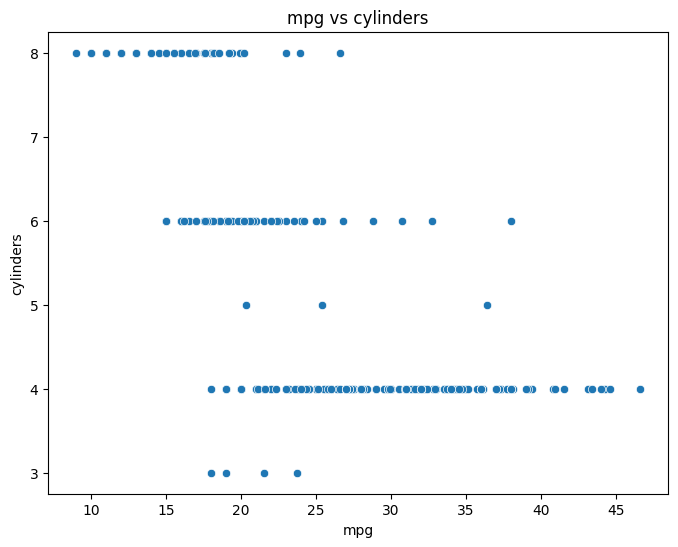

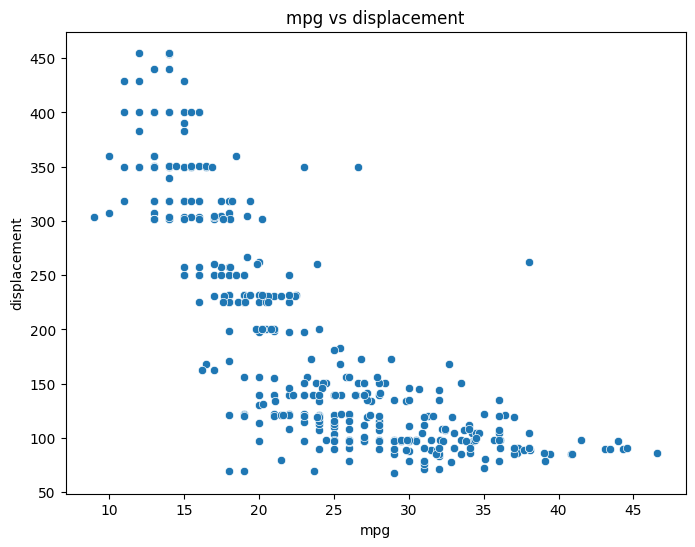

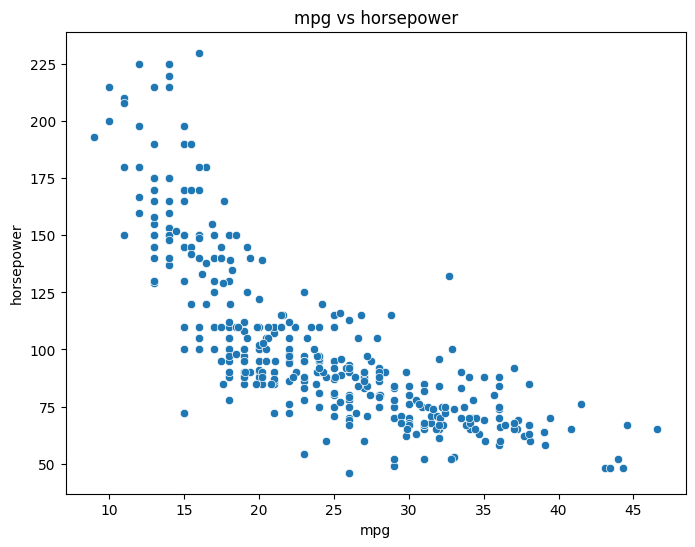

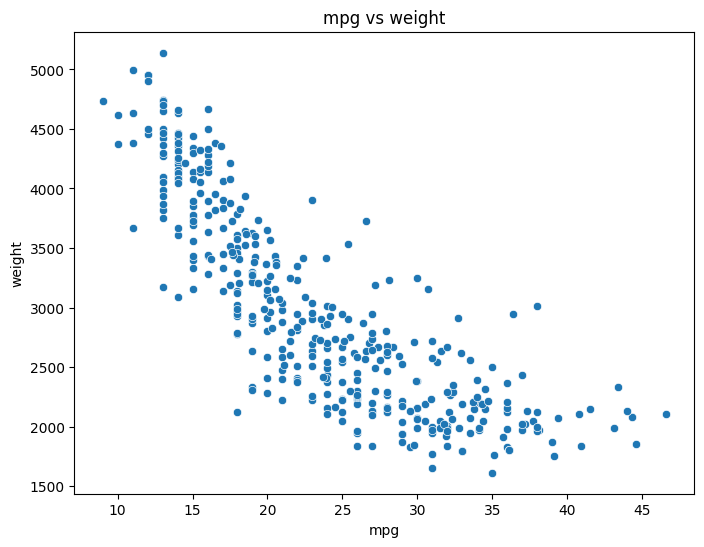

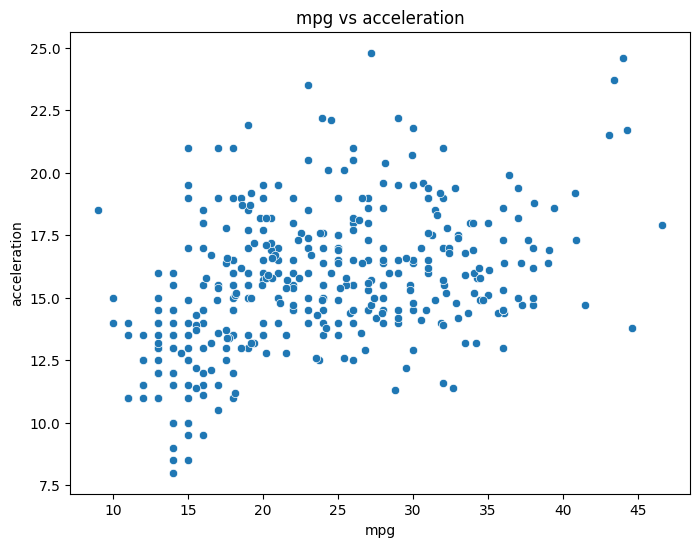

In [14]:
n = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

for feature in n:
    plt.figure(figsize=(8, 6))
    plt.title(f"mpg vs {feature}")
    plt.xlabel("mpg")
    plt.ylabel(feature)
    sns.scatterplot(data=automobile_df, x="mpg", y=feature)
    plt.show()

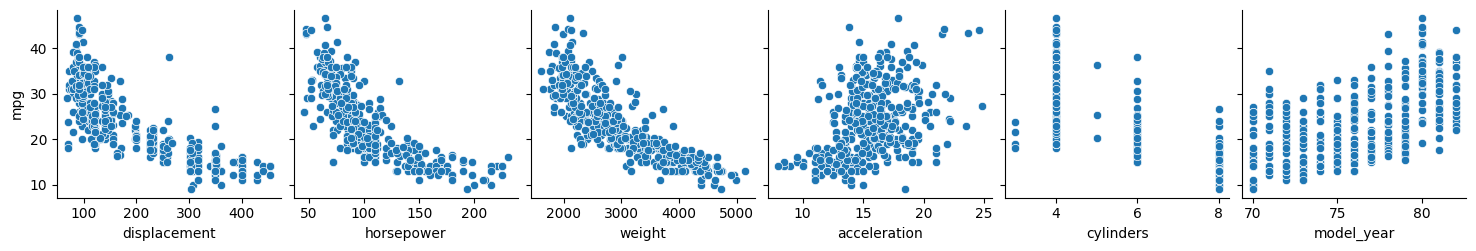

In [23]:
sns.pairplot( automobile_df, x_vars
             = ['displacement','horsepower','weight','acceleration',
                'cylinders','model_year'], y_vars = ['mpg'])

# 4. Model Train

AutoML 기법 중 하나인 autogluon.tabular 사용 <br>
공식 문서: https://auto.gluon.ai/stable/api/autogluon.tabular.TabularPredictor.html

In [25]:
train_x = automobile_df[['cylinders', 'displacement', 'horsepower',
                         'weight', 'acceleration', 'model_year']]
train_y = automobile_df['mpg']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, train_size = 0.8, random_state = 422)

In [ ]:
train_data = pd.concat([X_train, y_train], axis=1)
predictor = TabularPredictor(
    label='mpg',
    problem_type='regression',
    eval_metric='rmse').fit(train_data,
      presets = 'best_quality', auto_stack = True,
      fit_weighted_ensemble = True,
      num_bag_folds = 5,
      num_bag_sets = 2,
      num_stack_levels = 2)

No path specified. Models will be saved in: "AutogluonModels/ag-20231122_160320/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=5, num_bag_sets=2
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231122_160320/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Aug 30 11:19:59 UTC 2023
Disk Space Avail:   47.93 GB / 83.96 GB (57.1%)
Train Data Rows:    318
Train Data Columns: 6
Label Column: mpg
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11082.85 MB
	Train Data (Original)  Memory Usage: 0.02 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeF

# 5. Predict

AutoML이 성능 좋은 모델 순서대로 출력해준건데 도움될수도

In [ ]:
ld_board = predictor.leaderboard(train_data)
ld_board

                     model  score_test  score_val  pred_time_test  pred_time_val    fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    KNeighborsDist_BAG_L1   -0.118958  -3.978175        0.024580       0.012478    0.003521                 0.024580                0.012478           0.003521            1       True          2
1     LightGBMLarge_BAG_L1   -1.036780  -3.410825        5.927711       0.408859   62.539409                 5.927711                0.408859          62.539409            1       True         11
2     ExtraTreesMSE_BAG_L1   -1.212564  -3.311110        0.147420       0.204653    0.903142                 0.147420                0.204653           0.903142            1       True          7
3   RandomForestMSE_BAG_L1   -1.234531  -3.373532        0.203239       0.127558    0.704438                 0.203239                0.127558           0.704438            1       True          5
4           XGBoost_

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDist_BAG_L1,-0.118958,-3.978175,0.024580,0.012478,0.003521,0.024580,0.012478,0.003521,1,True,2
1,LightGBMLarge_BAG_L1,-1.036780,-3.410825,5.927711,0.408859,62.539409,5.927711,0.408859,62.539409,1,True,11
2,ExtraTreesMSE_BAG_L1,-1.212564,-3.311110,0.147420,0.204653,0.903142,0.147420,0.204653,0.903142,1,True,7
3,RandomForestMSE_BAG_L1,-1.234531,-3.373532,0.203239,0.127558,0.704438,0.203239,0.127558,0.704438,1,True,5
4,XGBoost_BAG_L1,-1.249219,-3.326983,0.588965,0.100239,24.902134,0.588965,0.100239,24.902134,1,True,9
5,CatBoost_BAG_L1,-1.257627,-3.211972,0.082212,0.020486,55.909856,0.082212,0.020486,55.909856,1,True,6
6,WeightedEnsemble_L2,-1.365415,-3.189245,1.169447,0.560839,131.270629,0.015555,0.000693,0.742148,2,True,12
7,NeuralNetFastAI_BAG_L2,-1.656935,-3.229744,12.324902,1.957160,421.821284,1.276630,0.329595,71.897424,2,True,18
8,WeightedEnsemble_L3,-1.772172,-3.186933,15.315802,3.008434,616.823133,0.034759,0.000847,0.412115,3,True,22
9,RandomForestMSE_BAG_L2,-1.822456,-3.399487,11.205345,1.865262,351.811820,0.157073,0.237697,1.887961,2,True,15


모델이 자동으로 변수 중요도 출력해준건데 유용하게 사용될수도

In [ ]:
feature_importance = predictor.feature_importance(train_data)
feature_importance

Computing feature importance via permutation shuffling for 5 features using 318 rows with 5 shuffle sets...
	301.49s	= Expected runtime (60.3s per shuffle set)
	118.01s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
horsepower,3.469713,0.176755,8.053701e-07,5,3.833654,3.105771
displacement,3.275489,0.091183,7.199173e-08,5,3.463235,3.087742
weight,1.959649,0.093354,6.161393e-07,5,2.151865,1.767433
acceleration,1.251807,0.103461,5.548741e-06,5,1.464834,1.038779
cylinders,1.207325,0.057915,6.334480e-07,5,1.326572,1.088078


In [ ]:
y_pred = predictor.predict(TabularDataset(X_test))

In [ ]:
results = predictor.fit_summary()
results

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -3.186933       3.008434  616.823133                0.000847           0.412115            3       True         22
1      WeightedEnsemble_L2  -3.189245       0.560839  131.270629                0.000693           0.742148            2       True         12
2      WeightedEnsemble_L4  -3.202221       4.472712  858.808511                0.000736           0.679707            4       True         32
3   NeuralNetFastAI_BAG_L3  -3.210650       4.266324  769.364747                0.733021          82.909039            3       True         28
4          CatBoost_BAG_L1  -3.211972       0.020486   55.909856                0.020486          55.909856            1       True          6
5   NeuralNetFastAI_BAG_L2  -3.229744       1.957160  421.821284                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFa

예측값이랑 실제값 시각화하긴했는데 이거 말고 다르게 해도 될듯

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6780089673461889

In [ ]:
def visualize_predictions(y_test, y_pred):

    plt.figure(figsize=(10, 6))

    # 산점도 시각화
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

    # 대각선 선 추가 (이상적인 예측을 표현)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)

    # 레이블 및 제목 추가
    plt.title('real vs. predice')
    plt.xlabel('real')
    plt.ylabel('predict')

    plt.show()

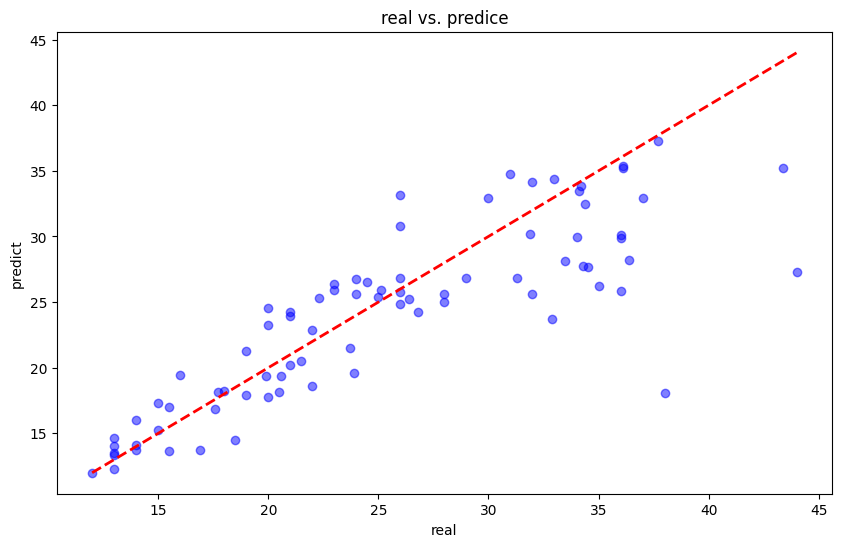

In [ ]:
visualize_predictions(y_test, y_pred);